## Classification of CIFAR-10 data with Data Augmentation

### Step-1

In [34]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

### Step-2

In [2]:
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 [==============================] - 1451s 9us/step


In [3]:
print('x_train.shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train.shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
x_train[444].shape

(32, 32, 3)

### Step-3

In [5]:
num_classes=10
y_train=keras.utils.np_utils.to_categorical(y_train,num_classes)
y_test=keras.utils.np_utils.to_categorical(y_test,num_classes)

In [6]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Step-4

In [8]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train /= 255
x_test /= 255

### Step-5

In [26]:
model=Sequential()
model.add(Conv2D(32, (5,5), strides=(2,2),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32,(5,5),strides=(2,2)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        2432      
                                                                 
 activation_16 (Activation)  (None, 16, 16, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 6, 6, 32)          25632     
                                                                 
 activation_17 (Activation)  (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 3, 3, 32)          0         
                                                      

### Step-6

In [27]:
batch_size=32

opt=keras.optimizers.RMSprop(lr=.0005,decay=1e-6)

model.compile(loss='categorical_crossentropy',
               optimizer=opt,
               metrics=['accuracy'])

In [28]:
history=model.fit(x_train,y_train,batch_size=32,epochs=15,validation_data=(x_test,y_test))

Epoch 1/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7431 - accuracy: 0.3622 - val_loss: 1.4641 - val_accuracy: 0.4756
Epoch 2/15
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4608 - accuracy: 0.4718 - val_loss: 1.3406 - val_accuracy: 0.5220
Epoch 3/15
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3568 - accuracy: 0.5108 - val_loss: 1.2180 - val_accuracy: 0.5698
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2914 - accuracy: 0.5386 - val_loss: 1.1850 - val_accuracy: 0.5789
Epoch 5/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2496 - accuracy: 0.5569 - val_loss: 1.1600 - val_accuracy: 0.5938
Epoch 6/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2207 - accuracy: 0.5698 - val_loss: 1.1704 - val_accuracy: 0.5819
Epoch 7/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1953 - accuracy: 0.5789 - val_loss: 1.1288 - val_ac

### Step-7

In [29]:
model1=Sequential()
model1.add(Conv2D(32, (5,5), strides=(2,2),padding='same',input_shape=x_train.shape[1:]))
model1.add(Activation('relu'))

model1.add(Conv2D(32,(5,5),strides=(2,2)))
model1.add(Activation('relu'))

model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(.5))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 16, 16, 32)        2432      
                                                                 
 activation_20 (Activation)  (None, 16, 16, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 6, 6, 32)          25632     
                                                                 
 activation_21 (Activation)  (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 3, 3, 32)          0         
                                                      

In [30]:
datagen=ImageDataGenerator(featurewise_center=False,
                           samplewise_center=False,
                           featurewise_std_normalization=False,
                           samplewise_std_normalization=False,
                           zca_whitening=False,
                           rotation_range=0,
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=True,
                           vertical_flip=False,)

datagen.fit(x_train)

In [31]:
batch_size=32

opt=keras.optimizers.RMSprop(lr=.0005,decay=1e-6)

model1.compile(loss='categorical_crossentropy',
               optimizer=opt,
               metrics=['accuracy'])

In [32]:
history1=model1.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                   steps_per_epoch=x_train.shape[0] // batch_size,
                   epochs=15,
                   validation_data=(x_test,y_test))

Epoch 1/15


C:\Users\2mscdsa45\AppData\Local\Temp\ipykernel_7780\2152443736.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1=model1.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),


1562/1562 [==============================] - 16s 10ms/step - loss: 1.7703 - accuracy: 0.3495 - val_loss: 1.4927 - val_accuracy: 0.4567
Epoch 2/15
1562/1562 [==============================] - 15s 10ms/step - loss: 1.5185 - accuracy: 0.4520 - val_loss: 1.2846 - val_accuracy: 0.5371
Epoch 3/15
1562/1562 [==============================] - 15s 9ms/step - loss: 1.4302 - accuracy: 0.4855 - val_loss: 1.2301 - val_accuracy: 0.5578
Epoch 4/15
1562/1562 [==============================] - 15s 9ms/step - loss: 1.3682 - accuracy: 0.5109 - val_loss: 1.1792 - val_accuracy: 0.5812
Epoch 5/15
1562/1562 [==============================] - 15s 9ms/step - loss: 1.3311 - accuracy: 0.5228 - val_loss: 1.1217 - val_accuracy: 0.6031
Epoch 6/15
1562/1562 [==============================] - 15s 9ms/step - loss: 1.3062 - accuracy: 0.5362 - val_loss: 1.1508 - val_accuracy: 0.5964
Epoch 7/15
1562/1562 [==============================] - 15s 9ms/step - loss: 1.2839 - accuracy: 0.5442 - val_loss: 1.1537 - val_accuracy: 0

### Step-8

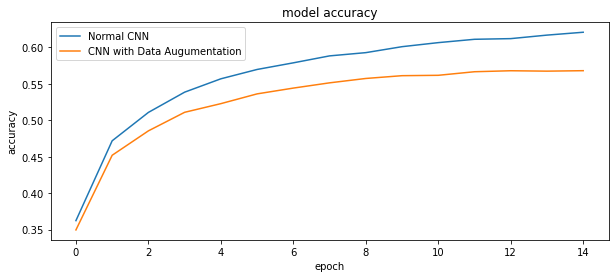

In [37]:
figure(figsize=(10, 4))
plt.plot(history.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Normal CNN', 'CNN with Data Augumentation'], loc='upper left')
plt.show()

In [38]:
datagen=ImageDataGenerator(featurewise_center=False,
                           samplewise_center=False,
                           featurewise_std_normalization=False,
                           samplewise_std_normalization=False,
                           zca_whitening=False,
                           rotation_range=0.2,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           horizontal_flip=False,
                           vertical_flip=True)

datagen.fit(x_train)

In [39]:
batch_size=32

opt=keras.optimizers.RMSprop(lr=.0005,decay=1e-6)

model1.compile(loss='categorical_crossentropy',
               optimizer=opt,
               metrics=['accuracy'])

In [40]:
model1.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                   steps_per_epoch=x_train.shape[0] // batch_size,
                   epochs=10,
                   validation_data=(x_test,y_test))

Epoch 1/10


C:\Users\2mscdsa45\AppData\Local\Temp\ipykernel_7780\3948953035.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model1.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),


1562/1562 [==============================] - 16s 10ms/step - loss: 1.6510 - accuracy: 0.4127 - val_loss: 1.2547 - val_accuracy: 0.5631
Epoch 2/10
1562/1562 [==============================] - 16s 10ms/step - loss: 1.6124 - accuracy: 0.4288 - val_loss: 1.2565 - val_accuracy: 0.5538
Epoch 3/10
1562/1562 [==============================] - 15s 10ms/step - loss: 1.6003 - accuracy: 0.4335 - val_loss: 1.4211 - val_accuracy: 0.5364
Epoch 4/10
1562/1562 [==============================] - 15s 10ms/step - loss: 1.5969 - accuracy: 0.4389 - val_loss: 1.3693 - val_accuracy: 0.5326
Epoch 5/10
1562/1562 [==============================] - 15s 10ms/step - loss: 1.5884 - accuracy: 0.4375 - val_loss: 1.2777 - val_accuracy: 0.5481
Epoch 6/10
1562/1562 [==============================] - 15s 10ms/step - loss: 1.5831 - accuracy: 0.4403 - val_loss: 1.3362 - val_accuracy: 0.5319
Epoch 7/10
1562/1562 [==============================] - 15s 10ms/step - loss: 1.5944 - accuracy: 0.4365 - val_loss: 1.3135 - val_accura

 If we change any values in Datagen. It will be worse

### Step-9

In [17]:
model2=Sequential()
model2.add(Conv2D(32, (5,5), strides=(1,1),padding='same',activation='relu',input_shape=x_train.shape[1:]))
model2.add(Conv2D(32,(5,5),strides=(1,1)))
model2.add(Activation('relu'))

model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(32, (5,5), strides=(1,1),padding='same',activation='relu',input_shape=x_train.shape[1:]))
model2.add(Conv2D(32,(5,5),strides=(1,1)))
model2.add(Activation('relu'))

model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 activation_8 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        25632     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 32)        25632     
                                                      

In [18]:
datagen=ImageDataGenerator(featurewise_center=False,
                           samplewise_center=False,
                           featurewise_std_normalization=False,
                           samplewise_std_normalization=False,
                           zca_whitening=False,
                           rotation_range=0,
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           horizontal_flip=True,
                           vertical_flip=False,)

datagen.fit(x_train)

In [19]:
batch_size=32

opt=keras.optimizers.RMSprop(lr=.0005,decay=1e-6)

model2.compile(loss='categorical_crossentropy',
               optimizer=opt,
               metrics=['accuracy'])

In [25]:
model2.fit(datagen.flow(x_train,y_train,batch_size=batch_size),
                   steps_per_epoch=x_train.shape[0] // batch_size,
                   epochs=10,
                   validation_data=(x_test,y_test))

Epoch 1/10
1562/1562 [==============================] - 117s 75ms/step - loss: 1.2376 - accuracy: 0.5578 - val_loss: 1.0635 - val_accuracy: 0.6275
Epoch 2/10
1562/1562 [==============================] - 116s 74ms/step - loss: 1.0848 - accuracy: 0.6144 - val_loss: 0.9661 - val_accuracy: 0.6627
Epoch 3/10
1562/1562 [==============================] - 116s 74ms/step - loss: 0.9879 - accuracy: 0.6520 - val_loss: 0.9280 - val_accuracy: 0.6822
Epoch 4/10
1562/1562 [==============================] - 114s 73ms/step - loss: 0.9133 - accuracy: 0.6820 - val_loss: 0.8757 - val_accuracy: 0.7108
Epoch 5/10
1562/1562 [==============================] - 115s 74ms/step - loss: 0.8772 - accuracy: 0.6949 - val_loss: 0.8063 - val_accuracy: 0.7200
Epoch 6/10
1562/1562 [==============================] - 118s 75ms/step - loss: 0.8514 - accuracy: 0.7049 - val_loss: 0.8025 - val_accuracy: 0.7232
Epoch 7/10
1562/1562 [==============================] - 116s 74ms/step - loss: 0.8320 - accuracy: 0.7153 - val_loss: 0